In [95]:
from sklearn.preprocessing import LabelEncoder## 标签编码器
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#数据的加载

In [96]:
data2=pd.read_excel("./第四题文件.xlsx")
data2


,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式,聚类种类
0,1,34,2,5,37.0,1,3,13,9,中等型,1,1,10:00:00,3.0,2.0,类别3
1,2,33,2,5,42.0,1,0,0,3,安静型,2,3,11:00:00,0.0,4.0,类别4
2,3,37,2,5,41.0,1,4,8,9,安静型,1,1,12:00:00,1.0,2.0,类别4
3,4,31,2,5,37.5,1,6,16,13,安静型,2,3,11:00:00,2.0,1.0,类别3
4,5,36,1,5,40.0,1,1,3,3,中等型,2,3,10:30:00,1.0,4.0,类别4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,406,31,2,3,39.5,1,1,4,4,NaN,2,2,NaN,NaN,NaN,NaN
396,407,26,2,2,37.0,1,4,9,14,NaN,2,2,NaN,NaN,NaN,NaN
397,408,26,2,5,39.0,1,0,3,3,NaN,1,1,NaN,NaN,NaN,NaN
398,409,27,2,5,41.2,1,0,0,4,NaN,1,1,NaN,NaN,NaN,NaN


In [97]:
data2["整晚睡眠时间（时：分：秒）"] = pd.to_datetime(data2["整晚睡眠时间（时：分：秒）"],format='%H:%M:%S')
data2["整晚睡眠时间（时：分：秒）"] = data2["整晚睡眠时间（时：分：秒）"].apply(lambda x : x.hour*60 + x.minute)

In [98]:
train_data = data2[data2["编号"]<=390]

In [99]:
le = LabelEncoder()##标签编码器对象

In [100]:
train_data["聚类种类"] = le.fit_transform(train_data["聚类种类"].astype(str))
train_data["聚类种类"].head()


<ipython-input-100-c1a9ab761f16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["聚类种类"] = le.fit_transform(train_data["聚类种类"].astype(str))


0    2
1    3
2    3
3    2
4    3
Name: 聚类种类, dtype: int32

In [101]:
test_data = data2[data2["编号"]>390]
test_data

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式,聚类种类
380,391,29,2,4,40.0,1,7,15,12,NaN,1,3,NaN,NaN,NaN,NaN
381,392,29,2,3,42.0,1,9,14,12,NaN,2,3,NaN,NaN,NaN,NaN
382,393,23,2,2,38.5,1,7,12,7,NaN,1,3,NaN,NaN,NaN,NaN
383,394,27,2,3,36.3,1,8,4,5,NaN,2,2,NaN,NaN,NaN,NaN
384,395,36,2,4,39.0,1,6,6,8,NaN,2,2,NaN,NaN,NaN,NaN
385,396,30,2,5,41.2,1,5,8,5,NaN,1,3,NaN,NaN,NaN,NaN
386,397,28,2,2,40.6,1,8,11,9,NaN,2,1,NaN,NaN,NaN,NaN
387,398,32,2,5,37.0,1,3,6,7,NaN,2,3,NaN,NaN,NaN,NaN
388,399,28,2,5,38.0,1,7,11,5,NaN,1,1,NaN,NaN,NaN,NaN
389,400,31,2,4,42.0,1,4,5,8,NaN,1,1,NaN,NaN,NaN,NaN


In [102]:
from sklearn.model_selection import train_test_split
train_features = train_data.drop(["编号","婴儿行为特征","婴儿性别","婴儿年龄（月）",
                                  "整晚睡眠时间（时：分：秒）","睡醒次数","入睡方式","聚类种类"],axis = 1)
train_target = train_data["聚类种类"]
x_train,x_test,y_train,y_test = train_test_split(train_features,train_target,test_size = 0.3,random_state=0)#30%为测试集，则70%为训练集

In [103]:
train_features

,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS
0,34,2,5,37.0,1,3,13,9
1,33,2,5,42.0,1,0,0,3
2,37,2,5,41.0,1,4,8,9
3,31,2,5,37.5,1,6,16,13
4,36,1,5,40.0,1,1,3,3
...,...,...,...,...,...,...,...,...
375,27,2,5,42.0,1,12,20,14
376,31,2,3,39.0,1,4,7,12
377,31,2,5,41.6,1,0,3,1
378,27,2,3,40.0,1,1,10,5


In [104]:
x_train.shape#查看训练集数据量
x_test.shape#查看测试集数据量

(114, 8)

In [113]:
test_features = test_data.drop(["编号","婴儿行为特征","婴儿性别","婴儿年龄（月）",
                                  "整晚睡眠时间（时：分：秒）","睡醒次数","入睡方式","聚类种类"],axis = 1)
## 创建随机森林分类器
rf = RandomForestClassifier(random_state=5)
rf.fit(x_train,y_train)#模型拟合

RandomForestClassifier(random_state=5)

In [114]:
test_features

,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS
380,29,2,4,40.0,1,7,15,12
381,29,2,3,42.0,1,9,14,12
382,23,2,2,38.5,1,7,12,7
383,27,2,3,36.3,1,8,4,5
384,36,2,4,39.0,1,6,6,8
385,30,2,5,41.2,1,5,8,5
386,28,2,2,40.6,1,8,11,9
387,32,2,5,37.0,1,3,6,7
388,28,2,5,38.0,1,7,11,5
389,31,2,4,42.0,1,4,5,8


In [115]:
score1 = rf.score(x_test,y_test)#查看拟合出的分类器在测试集上的效果
print(score1)

0.41228070175438597


In [116]:
test_predictions = rf.predict(test_features)

test_predictions_labels = le.inverse_transform(test_predictions)
print('预测结果是')
print(test_predictions_labels)

预测结果是
['类别4' '类别4' '类别3' '类别4' '类别3' '类别4' '类别4' '类别3' '类别3' '类别4' '类别2' '类别4'
 '类别2' '类别3' '类别4' '类别3' '类别2' '类别3' '类别3' '类别4']


In [117]:
train_targe_predict = rf.predict(train_features)

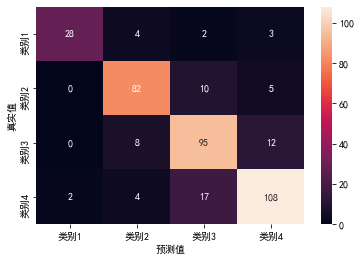

In [118]:
## 计算混淆矩阵并且可视化
cm = confusion_matrix(train_target,train_targe_predict)
sns.heatmap(cm,annot = True,fmt = "d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.ylabel("真实值")
plt.xlabel("预测值")
plt.show()